# Linear Regression Project: Student Performance Prediction

#### This project  worked with a dataset available on <a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams">Kaggle</a>. The data contains information about the student which include the following: 
#### Categorical Features
1. gender: female, male
2. race/ethnicity: group B, group C, group A, group D, group E
3. parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
4. lunch: standard, free/reduced
5. test preparation course: none, completed

#### Numeric Features
1. math score
2. reading score 
3. wriring score

### What is the objective of the project?
The goal is to use the available features (gender, race/ethnicity, parental level of education, lunch, test preparation course, writing score, reading score) to predict students math score. 
#### NB: In machine learning, you can use any feature to predict any target, as long as it improves performance and makes statistical and logical sense.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

## Exploratory Data Analysis

Visualisation showed that 
1. there is linear relationship between the numerical features 
2. there is a high correlation between the writing score and the math score and also between the reading score and the math score

Although using writing score to predict math score might not make sense in real life from a subject-matter perspective, the strong statistical correlation between them can still improve model performance in a machine learning context.

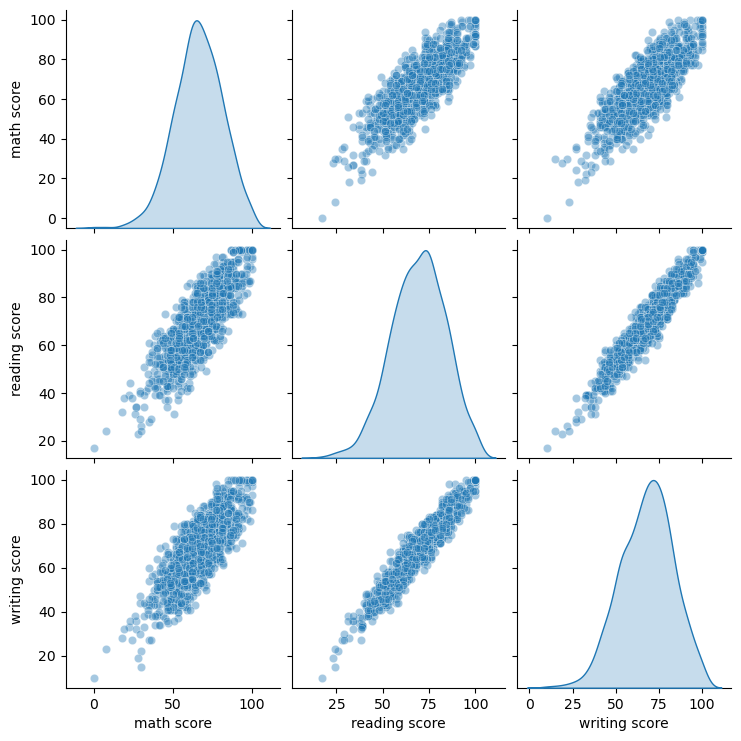

In [4]:
sns.pairplot(data=df, 
             diag_kind='kde',
             plot_kws={'alpha':0.4})

Text(0.5, 1.0, 'Linear Model plot of writing score vs math score')

<Figure size 800x300 with 0 Axes>

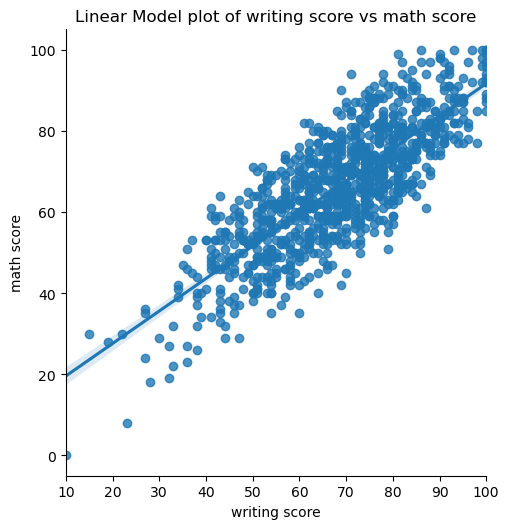

In [5]:
plt.figure(figsize=(8,3))
sns.lmplot(x='writing score', y='math score', data=df)
plt.title("Linear Model plot of writing score vs math score")

Text(0.5, 1.0, 'Linear Model plot of reading score vs math score')

<Figure size 800x300 with 0 Axes>

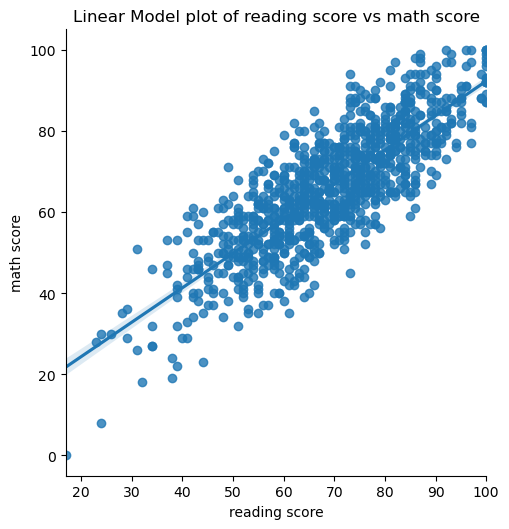

In [6]:
plt.figure(figsize=(8,3))
sns.lmplot(x='reading score', y='math score', data=df)
plt.title("Linear Model plot of reading score vs math score")

In [7]:
df.corr()

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

Text(0.5, 1.0, 'Correlation between numeric variables/labels')

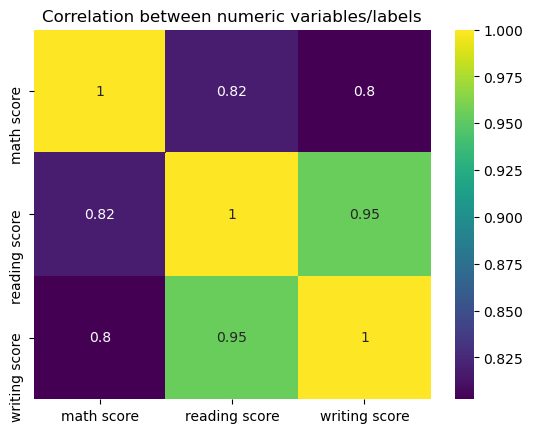

In [8]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.title("Correlation between numeric variables/labels")

## Preprocessing 
Encoding categorical features and preparing data for modeling

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
df_encoded

math score  reading score  writing score  gender_male  \
0            72             72             74            0   
1            69             90             88            0   
2            90             95             93            0   
3            47             57             44            1   
4            76             78             75            1   
..          ...            ...            ...          ...   
995          88             99             95            0   
996          62             55             55            1   
997          59             71             65            0   
998          68             78             77            0   
999          77             86             86            0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                       0                       0   
1                         0                       1                       0   
2                         1                       0                       0   
3                         0                       0                       0   
4                         0                       1                       0   
..                      ...                     ...                     ...   
995                       0                       0                       0   
996                       0                       1                       0   
997                       0                       1                       0   
998                       0                       0                       1   
999                       0                       0                       1   

     race/ethnicity_group E  parental level of education_bachelor's degree  \
0                         0                                              1   
1                         0                                              0   
2                         0                                              0   
3                         0                                              0   
4                         0                                              0   
..                      ...                                            ...   
995                       1                                              0   
996                       0                                              0   
997                       0                                              0   
998                       0                                              0   
999                       0                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
995                                            1   
996                                            0   
997                                            0   
998                                            0   
999                                            0   

     parental level of education_some college  \
0                                           0   
1                                           1   
2                        

In [11]:
X = df_encoded.drop(df_encoded[['math score']], axis=1)

In [12]:
X

reading score  writing score  gender_male  race/ethnicity_group B  \
0               72             74            0                       1   
1               90             88            0                       0   
2               95             93            0                       1   
3               57             44            1                       0   
4               78             75            1                       0   
..             ...            ...          ...                     ...   
995             99             95            0                       0   
996             55             55            1                       0   
997             71             65            0                       0   
998             78             77            0                       0   
999             86             86            0                       0   

     race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                         0                       0                       0   
1                         1                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         1                       0                       0   
..                      ...                     ...                     ...   
995                       0                       0                       1   
996                       1                       0                       0   
997                       1                       0                       0   
998                       0                       1                       0   
999                       0                       1                       0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
995                                            1   
996                                            0   
997                                            0   
998                                            0   
999                                            0   

     parental level of education_some college  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           1   
..                    

In [13]:
y = df_encoded['math score']

In [14]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## Spliting the Data For Training

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.head()

reading score  writing score  gender_male  race/ethnicity_group B  \
541             82             80            1                       0   
440             81             79            0                       0   
482             68             61            1                       0   
422             58             67            0                       0   
778             79             82            0                       0   

     race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
541                       0                       1                       0   
440                       1                       0                       0   
482                       1                       0                       0   
422                       0                       1                       0   
778                       0                       0                       0   

     parental level of education_bachelor's degree  \
541                                              0   
440                                              0   
482                                              0   
422                                              0   
778                                              0   

     parental level of education_high school  \
541                                        0   
440                                        0   
482                                        0   
422                                        0   
778                                        0   

     parental level of education_master's degree  \
541                                            0   
440                                            0   
482                                            0   
422                                            1   
778                                            0   

     parental level of education_some college  \
541                                         0   
440                                         1   
482                                         1   
422                                         0   
778                                         1   

     parental level of education_some high school  lunch_standard  \
541                                             0               0   
440                                             0               1   
482                                             0               0   
422                                             0               0   
778                                             0               1   

     test preparation course_none  
541                             0  
440                             0  
482                             1  
422                             0  
778                             0

In [18]:
X_test.head()

reading score  writing score  gender_male  race/ethnicity_group B  \
521             86             84            0                       0   
737             66             73            0                       1   
740             73             72            1                       0   
660             77             73            1                       0   
411             83             78            1                       0   

     race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
521                       1                       0                       0   
737                       0                       0                       0   
740                       0                       1                       0   
660                       1                       0                       0   
411                       0                       0                       1   

     parental level of education_bachelor's degree  \
521                                              0   
737                                              0   
740                                              1   
660                                              0   
411                                              0   

     parental level of education_high school  \
521                                        0   
737                                        0   
740                                        0   
660                                        0   
411                                        0   

     parental level of education_master's degree  \
521                                            0   
737                                            0   
740                                            0   
660                                            0   
411                                            0   

     parental level of education_some college  \
521                                         0   
737                                         1   
740                                         0   
660                                         1   
411                                         1   

     parental level of education_some high school  lunch_standard  \
521                                             0               1   
737                                             0               0   
740                                             0               1   
660                                             0               0   
411                                             0               1   

     test preparation course_none  
521                             1  
737                             0  
740                             1  
660                             1  
411                             0

## Algorithm Selection

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()


## Training

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions = model.predict(X_test)

In [23]:
model.coef_

array([ 0.23985294,  0.72310157, 12.98135695, -0.17704969, -0.79299671,
       -0.9478648 ,  4.46909069, -0.60435578,  0.82568446, -1.39628712,
        1.00013219,  0.67098546,  3.4144663 ,  3.06390874])

In [24]:
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficient'])

Coefficient
reading score                                     0.239853
writing score                                     0.723102
gender_male                                      12.981357
race/ethnicity_group B                           -0.177050
race/ethnicity_group C                           -0.792997
race/ethnicity_group D                           -0.947865
race/ethnicity_group E                            4.469091
parental level of education_bachelor's degree    -0.604356
parental level of education_high school           0.825684
parental level of education_master's degree      -1.396287
parental level of education_some college          1.000132
parental level of education_some high school      0.670985
lunch_standard                                    3.414466
test preparation course_none                      3.063909

In [25]:
model.intercept_

-10.541610907538626

In [26]:
predictions

array([ 76.511652  ,  58.89818013,  76.93847803,  76.96588112,
        87.63315155,  78.94668281,  64.60780093,  52.83011773,
        74.28323561,  48.94737113,  53.03440427,  36.20260815,
        67.86648609,  52.27420197,  86.79820118,  70.59883397,
        51.63855945,  46.80113844,  48.61883998,  52.72027293,
        73.89225713,  39.34102125,  57.79189897,  36.36055882,
        78.23627285,  81.63804754,  75.56062537,  46.17327085,
        31.44417895,  49.87212984,  65.58902229,  70.43151729,
        60.32667234,  83.48021561,  84.19623167,  45.82817241,
        76.05073377,  70.13652865,  65.96552567,   3.70880223,
        78.7290069 ,  67.01073937,  68.10392776,  60.49543662,
        79.65561335,  67.5109834 ,  72.06518844,  24.61823419,
        85.9787203 ,  70.49150482,  75.2833751 ,  66.72723882,
        81.4116524 ,  45.6531272 ,  66.11043199,  67.24766513,
        86.09186   ,  58.67846468,  81.91498574,  81.65594974,
        47.45253577,  72.39386125,  70.73746771,  55.70

In [27]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
468    77
935    70
428    65
7      40
155    70
Name: math score, Length: 300, dtype: int64

Text(0, 0.5, 'Predictions')

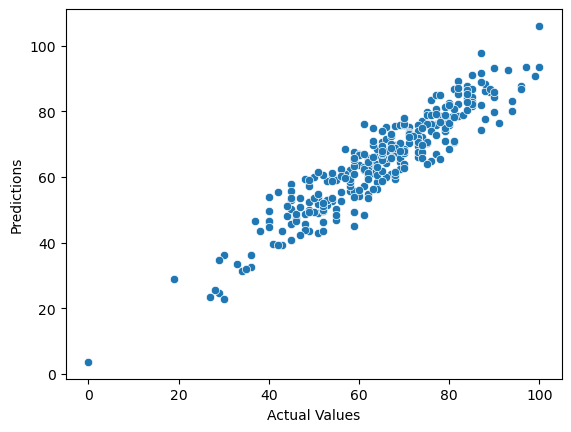

In [28]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

## Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2SCORE = r2_score(y_test, predictions)

In [31]:
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R2SCORE: {R2SCORE}")

Mean Absolute Error: 4.41826132029731
Mean Squared Error: 30.886593188073014
Root Mean Squared Error: 5.557570799195726
R2SCORE: 0.8758630443016736


In [32]:
residuals = y_test-predictions

In [33]:
residuals

521    14.488348
737    -5.898180
740     3.061522
660    -2.965881
411    -3.633152
         ...    
468     4.145234
935     7.393452
428     6.349653
7      -4.841375
155    -8.059841
Name: math score, Length: 300, dtype: float64

Text(0, 0.5, 'Residuals')

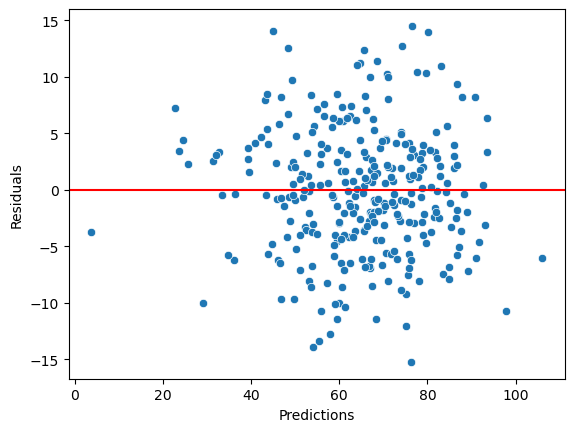

In [42]:
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [35]:
import scipy

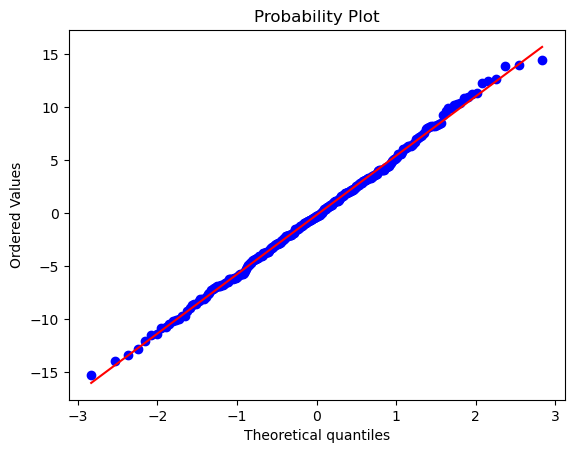

In [36]:
fig,ax = plt.subplots(ncols=1,nrows=1)
_ = scipy.stats.probplot(residuals, plot=ax)

## Saving the model

In [37]:
import joblib

In [38]:
joblib.dump(model,"Student_performance.joblib")

['Student_performance.joblib']

In [39]:
loaded_model = joblib.load("Student_performance.joblib")

In [40]:
loaded_model.intercept_

-10.541610907538626

In [41]:
loaded_model.predict([[77,74,1,0,0,0,0,0,0,1,0,0,1,0]])

array([76.43611764])